## Plot fine-tuning variance

Code to generate figures presented in Figure 10 (Fine-tuning variance of LXMERT models). Each model was fine-tuned 6 times on each task.

In [2]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score

matplotlib.rcParams['text.usetex'] = True
plt.rc('font', family='serif', serif=['Times'])

models = [
    '$\\mathrm{\\textsc{LXMERT}_{180K}}$',
    '$\\mathrm{\\textsc{LXMERT}_{3M}}$',
    '$\\mathrm{\\textsc{LXMERT}_{180K}^{N}}$',
    '$\\mathrm{\\textsc{LXMERT}_{3M}^{N}}$'
]


# VQAv2
vqa = {
    "lxmert_180k": [
[{"test-dev": {"yes/no": 88.38, "number": 52.53, "other": 62.34, "overall": 71.95}}],
[{"test-dev": {"yes/no": 88.31, "number": 52.8, "other": 62.32, "overall": 71.95}}],
[{"test-dev": {"yes/no": 88.37, "number": 53.06, "other": 62.22, "overall": 71.95}}],
[{"test-dev": {"yes/no": 88.19, "number": 52.54, "other": 62.19, "overall": 71.81}}],
[{"test-dev": {"yes/no": 87.21, "number": 50.54, "other": 60.39, "overall": 70.32}}],
[{"test-dev": {"overall": 70.33}}]
    ],
    "lxmert_3m": [
[{"test-dev": {"yes/no": 84.7, "number": 48.07, "other": 58.12, "overall": 67.93}}],
[{"test-dev": {"yes/no": 84.71, "number": 47.87, "other": 57.99, "overall": 67.85}}],
[{"test-dev": {"yes/no": 84.69, "number": 48.02, "other": 57.96, "overall": 67.85}}],
[{"test-dev": {"yes/no": 84.62, "number": 48.03, "other": 58.0, "overall": 67.83}}],
[{"test-dev": {"yes/no": 84.65, "number": 48.3, "other": 57.91, "overall": 67.83}}],
[{"test-dev": {"overall": 67.2}}]
    ],
    "lxmert_180k_n": [
[{"test-dev": {"yes/no": 88.32, "number": 52.3, "other": 62.24, "overall": 71.86}}],
[{"test-dev": {"yes/no": 88.24, "number": 52.38, "other": 62.17, "overall": 71.8}}],
[{"test-dev": {"yes/no": 88.39, "number": 52.63, "other": 62.31, "overall": 71.95}}],
[{"test-dev": {"yes/no": 88.4, "number": 53.01, "other": 62.26, "overall": 71.98}}],
[{"test-dev": {"yes/no": 88.26, "number": 52.79, "other": 62.21, "overall": 71.87}}],
[{"test-dev": {"overall": 70.59}}]
    ],
    "lxmert_3m_n": [
[{"test-dev": {"yes/no": 84.69, "number": 48.34, "other": 57.99, "overall": 67.89}}],
[{"test-dev": {"yes/no": 84.84, "number": 48.25, "other": 57.95, "overall": 67.92}}],
[{"test-dev": {"yes/no": 84.45, "number": 48.19, "other": 58.05, "overall": 67.81}}],
[{"test-dev": {"yes/no": 84.54, "number": 48.02, "other": 57.92, "overall": 67.76}}],
[{"test-dev": {"yes/no": 84.83, "number": 48.59, "other": 57.96, "overall": 67.97}}],
[{"test-dev": {"overall": 68.1}}]
    ]
}
vqa_ = {}
for k,v in vqa.items():
    vqa_[k] = [run[0]["test-dev"]["overall"] for run in v]


# GQA
gqa = {
    "lxmert_180k": [
{"Accuracy": 59.201451905626136, "Binary": 77.24334109128523, "Open": 43.33788085493406, "Validity": 96.96309739866908, "Plausibility": 85.14216575922565, "Consistency": 90.00747677402464, "Distribution": 1.2298570554490735},
{"Accuracy": 59.35874168179068, "Binary": 77.26920093095423, "Open": 43.61073215097772, "Validity": 96.92679975801572, "Plausibility": 85.11796733212341, "Consistency": 89.97464963613419, "Distribution": 1.1280006677686514},
{"Accuracy": 59.407138535995166, "Binary": 77.8122575640031, "Open": 43.22419281491587, "Validity": 96.99939503932245, "Plausibility": 85.0574712643678, "Consistency": 89.9631275952246, "Distribution": 1.198318909946321},
{"Accuracy": 59.61282516636419, "Binary": 77.73467804499612, "Open": 43.67894497498863, "Validity": 96.93889897156684, "Plausibility": 85.32365396249244, "Consistency": 90.18911181749284, "Distribution": 1.2239236417389783},
{"Accuracy": 59.61282516636419, "Binary": 77.73467804499612, "Open": 43.67894497498863, "Validity": 96.95099818511797, "Plausibility": 85.39624924379915, "Consistency": 90.497213948085, "Distribution": 1.1431149248743804},
{"Accuracy": 59.35874168179068}
],
     "lxmert_3m": [
{"Accuracy": 56.12825166364186, "Binary": 72.27825187483838, "Open": 41.92814915870851, "Validity": 97.03569267997581, "Plausibility": 85.28735632183908, "Consistency": 84.54711912605136, "Distribution": 1.2029614762935428},
{"Accuracy": 54.94252873563218, "Binary": 71.94207395914145, "Open": 39.99545247839927, "Validity": 96.9751966122202, "Plausibility": 85.2994555353902, "Consistency": 85.14248625238055, "Distribution": 1.2087821732050044},
{"Accuracy": 55.08771929824562, "Binary": 72.43341091285234, "Open": 39.83628922237381, "Validity": 96.9751966122202, "Plausibility": 85.25105868118573, "Consistency": 84.66492490817062, "Distribution": 1.3229177460166697},
{"Accuracy": 54.68844525105868, "Binary": 71.52831652443756, "Open": 39.88176443838108, "Validity": 96.89050211736237, "Plausibility": 85.44464609800363, "Consistency": 82.61447049021032, "Distribution": 1.2661084432261611},
{"Accuracy": 55.136116152450086, "Binary": 71.81277476079649, "Open": 40.47294224647567, "Validity": 96.99939503932245, "Plausibility": 85.31155474894132, "Consistency": 85.2650449901918, "Distribution": 1.239707056476749},
{"Accuracy": 55.43859649122807}
    ],
    "lxmert_180k_n": [
{"Accuracy": 59.33454325468844, "Binary": 77.8381174036721, "Open": 43.06502955889041, "Validity": 97.08408953418028, "Plausibility": 85.51724137931035, "Consistency": 89.97362471530928, "Distribution": 1.2281110569065696},
{"Accuracy": 59.73381730187538, "Binary": 78.12257564003103, "Open": 43.56525693497044, "Validity": 96.93889897156684, "Plausibility": 85.06957047791893, "Consistency": 89.96684668579094, "Distribution": 1.1759852045550654},
{"Accuracy": 59.56442831215971, "Binary": 77.8122575640031, "Open": 43.519781718963166, "Validity": 97.01149425287356, "Plausibility": 85.50514216575922, "Consistency": 90.15178390417577, "Distribution": 1.2106165090502603},
{"Accuracy": 59.6249243799153, "Binary": 77.78639772433411, "Open": 43.656207366984994, "Validity": 96.99939503932245, "Plausibility": 85.52934059286147, "Consistency": 90.20644998659473, "Distribution": 1.171088483491141},
{"Accuracy": 59.552329098608595, "Binary": 77.86397724334108, "Open": 43.45156889495225, "Validity": 97.07199032062917, "Plausibility": 85.34785238959468, "Consistency": 90.1191906780625, "Distribution": 1.1245539078602158},
{"Accuracy": 59.310344827586206}
],
    "lxmert_3m_n": [
{"Accuracy": 54.567453115547494, "Binary": 70.77838117403672, "Open": 40.3137789904502, "Validity": 96.93889897156684, "Plausibility": 85.5535390199637, "Consistency": 82.52406793477147, "Distribution": 1.196766697098285},
{"Accuracy": 54.156079854809434, "Binary": 71.3472976467546, "Open": 39.040472942246474, "Validity": 96.93889897156684, "Plausibility": 85.20266182698124, "Consistency": 81.83688901813615, "Distribution": 1.250069848510103},
{"Accuracy": 54.785238959467634, "Binary": 72.32997155417637, "Open": 39.35879945429741, "Validity": 96.92679975801572, "Plausibility": 85.03327283726559, "Consistency": 84.9724883978842, "Distribution": 1.192236792244215},
{"Accuracy": 54.736842105263165, "Binary": 72.09723299715542, "Open": 39.4724874943156, "Validity": 96.91470054446461, "Plausibility": 85.25105868118573, "Consistency": 83.120176163021, "Distribution": 1.3172595580485806},
{"Accuracy": 54.80943738656987, "Binary": 71.16627876907164, "Open": 40.42746703046839, "Validity": 96.9751966122202, "Plausibility": 85.0453720508167, "Consistency": 85.04674273897893, "Distribution": 1.3141682685592122},
{"Accuracy": 55.99516031457955}
    ]
}

gqa_ = {}
for k,v in gqa.items():
    gqa_[k] = [run["Accuracy"] for run in v]


# NLVR2
nlvr_ = {}
nlvr_["lxmert_180k"] = np.dot(100,[0.745, 0.7448918269230769, 0.7481971153846154, 0.7252103365384616, 0.7481971153846154, 0.7125901442307693])
nlvr_["lxmert_3m"] = np.dot(100,[0.715, 0.5252403846153846, 0.6742788461538461, 0.509765625, 0.7038762019230769, 0.7077824519230769])
nlvr_["lxmert_180k_n"] = np.dot(100,[0.745, 0.7462439903846154, 0.509765625, 0.7463942307692307, 0.7474459134615384, 0.7462439903846154])
nlvr_["lxmert_3m_n"] = np.dot(100,[0.70, 0.6975661057692307, 0.7005709134615384, 0.7004206730769231, 0.6015625, 0.705078125])
        

# F30K
results_ir = {}
results_ir["lxmert_180k"] = [53.0, 53.62, 52.28, 54.6, 48.38, 55.24]
results_ir["lxmert_3m"] = [54.4, 54.4, 45.82, 46.02, 45.42, 45.42]
results_ir["lxmert_180k_n"] = [53.9, 53.9, 52.48, 54.82, 49.46, 54.88]
results_ir["lxmert_3m_n"] = [50.2, 47.08, 44.46, 46.24, 46.48, 47.04]
results_tr = {}
results_tr["lxmert_180k"] = [61.1, 60.7, 59.7, 66.3, 58.7, 65.7]
results_tr["lxmert_3m"] = [59.5, 59.5, 51.7, 56.4, 54.2, 54.2]
results_tr["lxmert_180k_n"] = [66.2, 63.6, 60.6, 65.0, 56.4, 63.5]
results_tr["lxmert_3m_n"] = [57.4, 55.0, 51.7, 54.6, 54.9, 54.9]


data_ = [vqa_, gqa_, nlvr_]
index_ = ["vqa","gqa","nlvr"]
df = pd.DataFrame(data=data_, 
                  index=index_)
df = df.T
df

,vqa,gqa,nlvr
lxmert_180k,"[71.95, 71.95, 71.95, 71.81, 70.32, 70.33]","[59.201451905626136, 59.35874168179068, 59.407...","[74.5, 74.4891826923077, 74.81971153846155, 72..."
lxmert_3m,"[67.93, 67.85, 67.85, 67.83, 67.83, 67.2]","[56.12825166364186, 54.94252873563218, 55.0877...","[71.5, 52.52403846153846, 67.42788461538461, 5..."
lxmert_180k_n,"[71.86, 71.8, 71.95, 71.98, 71.87, 70.59]","[59.33454325468844, 59.73381730187538, 59.5644...","[74.5, 74.62439903846155, 50.9765625, 74.63942..."
lxmert_3m_n,"[67.89, 67.92, 67.81, 67.76, 67.97, 68.1]","[54.567453115547494, 54.156079854809434, 54.78...","[70.0, 69.75661057692307, 70.05709134615384, 7..."


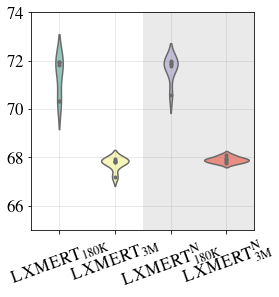

In [3]:
TASK="vqa"
ylim=[65, 74]

xs = df.index.to_list()*6
ys = [x[i] for i in range(6) for x in df[TASK].values]

f, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(ylim[0], ylim[1])

ax.axvspan(1.5, 3.5, facecolor='#999999', alpha=0.2)

sns.violinplot(x=xs, y=ys, inner='point', palette="Set3", ax=ax)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('figures/vqav2_fine_var.pdf', bbox_inches='tight')

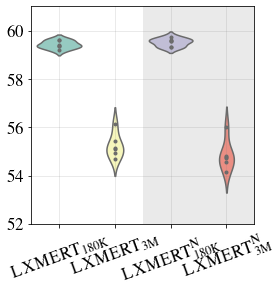

In [4]:
TASK="gqa"
ylim=[52, 61]

xs = df.index.to_list()*6
ys = [x[i] for i in range(6) for x in df[TASK].values]

f, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(ylim[0], ylim[1])

ax.axvspan(1.5, 3.5, facecolor='#999999', alpha=0.2)

sns.violinplot(x=xs, y=ys, inner='point', palette="Set3", ax=ax)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('figures/gqa_fine_var.pdf', bbox_inches='tight')

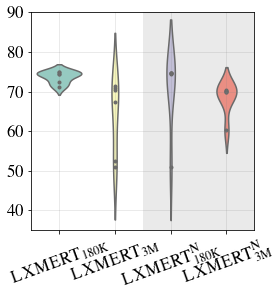

In [5]:
TASK="nlvr"
ylim=[35, 90]

xs = df.index.to_list()*6
ys = [x[i] for i in range(6) for x in df[TASK].values]

f, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(ylim[0], ylim[1])

ax.axvspan(1.5, 3.5, facecolor='#999999', alpha=0.2)

sns.violinplot(x=xs, y=ys, inner='point', palette="Set3", ax=ax)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('figures/nlvr_fine_var.pdf', bbox_inches='tight')

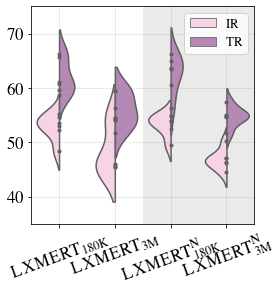

In [8]:
TASK="f30k"
ylim = [35, 75]

V=6
df = pd.DataFrame()
df['type'] = (['IR']*V + ['TR']*6)*4
df['model'] = ['lxmert_180k']*V*2 + ['lxmert_3m']*V*2 + ['lxmert_180k_n']*V*2 + ['lxmert_3m_n']*V*2 
df['values'] = results_ir['lxmert_180k'] + results_tr['lxmert_180k'] +\
results_ir['lxmert_3m'] + results_tr['lxmert_3m'] +\
results_ir['lxmert_180k_n'] + results_tr['lxmert_180k_n'] +\
results_ir['lxmert_3m_n'] + results_tr['lxmert_3m_n']

f, ax = plt.subplots(figsize=(4,4))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(ylim[0], ylim[1])

ax.axvspan(1.5, 3.5, facecolor='#999999', alpha=0.2)

cm = plt.get_cmap('Set3') 
colors = cm.colors

sns.violinplot(x="model", y="values", hue="type", data=df, palette=[colors[7], colors[9]], split=True, inner='points', ax=ax)

ax.legend(loc='upper right', fontsize=13)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.set_ylabel("", fontsize=16)
ax.set_xlabel("", fontsize=16)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('figures/retrieval_fine_var.pdf', bbox_inches='tight')